# **Setting up the environment**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

# **Custom Functions**

In [6]:
def stringToBinary(a):
  l=[]
  res = ''.join(format(ord(i), '08b') for i in a)
  return res

def binaryToString(a):
  return chr(binaryToInt(a))

def integerToBinary(a):
  return int(bin(a)[2:])

def binaryToInt(binary): 
    int_val, i, n = 0, 0, 0
    while(binary != 0): 
        a = binary % 10
        int_val = int_val + a * pow(2, i) 
        binary = binary//10
        i += 1
    return int_val

def calculatePSNR(originalImage, encodedImage):
  error = np.sum((originalImage.astype('float') - encodedImage.astype('float')) ** 2)
  error /= float(originalImage.shape[0] * originalImage.shape[1]);
  if error == 0:
      return 100
  PIXEL_MAX = 255.0
  return 20 * math.log10(PIXEL_MAX / math.sqrt(error))

# **Steganography**

## **Hiding the data**

In [14]:
def encodingMessage(imageName, key, message):
  # imgPath = "drive/MyDrive/Submitted_Projects/Steganography_SFLAB_1/"
  imgPath ="./"
  inputImage = cv2.imread(imgPath + imageName, cv2.IMREAD_UNCHANGED);
  outputImage = inputImage
  delimeter = "#@#@#@"
  height= inputImage.shape[0]
  width = inputImage.shape[1]
  dim = 1
  if(len(inputImage.shape) > 2):
    dim = inputImage.shape[2]

  binKey = stringToBinary(key)
  binMsg = stringToBinary(message + delimeter)
  lenBinKey = len(binKey)
  lenBinMsg = len(binMsg)

  index = -1
  count = 0
  pixel = 0

  for k in range(dim):
    for i in range(0, height, 1):
      for j in range(0, width, 1):
        index = index + 1;
        if((int)(binKey[index%lenBinKey]) == 1):
          if(count < lenBinMsg):
            if(dim == 1):
              pixel = integerToBinary(inputImage[i][j])
              newPixel = ((int)(pixel/10)*10) + (int)(binMsg[count])
              outputImage[i][j] = binaryToInt(newPixel);
            else:
              pixel = integerToBinary(inputImage[i][j][k])   
              newPixel = ((int)(pixel/10)*10) + (int)(binMsg[count])
              outputImage[i][j][k] = binaryToInt(newPixel);
            count = count + 1;
  psnr = calculatePSNR(inputImage, outputImage)
  cv2.imwrite(imgPath + "encodedImage.png", outputImage)
  return psnr, inputImage, outputImage;

## **Extracting the data**

In [13]:
def extractData(key):
  # imgPath = "drive/MyDrive/Submitted_Projects/Steganography_SFLAB_1/";
  imgPath = "./"
  inputImage = cv2.imread(imgPath + 'encodedImage.png');
  height= inputImage.shape[0]
  width = inputImage.shape[1]
  dim = inputImage.shape[2]
  
  binKey = stringToBinary(key)
  lenBinKey = len(binKey)
  delimeter = "#@#@#@"
  index = -1
  lenPixel = 0
  exMsg = ""
  newPixel = 0

  for k in range(dim):
    for i in range(0, height, 1):
      for j in range(0, width, 1):
        index += 1
        if((int)(binKey[index%lenBinKey]) == 1):
            pixel = integerToBinary(inputImage[i][j][k])
            newPixel = newPixel * 10 + pixel%10
            lenPixel += 1
            if(lenPixel == 8):
              exMsg += binaryToString(newPixel)
              lenPixel = 0
              newPixel = 0
              if("#@#@#@" in exMsg):
                return exMsg[:-6]
              

# **Results**

Enter the filename: (eg- Cover_1.png or Cover_2.png)Cover_1.png
Enter the key:dxtfvubhbuihuyfyutdf6drdty
Enter the message to be hidden:5fb2ebeffd014c0aff1d68ad68b0d2212c5fdb1378db6a697eb8225c8b0d7e39352277c30cb821f35f33499133e2f06c0a717a6e86074d6a1d3124bbed33687f6fe4b52ce75192106a6d650721960948185352ee1515934bcfc708ff264886584a3f89e88022ff609a6fe83035388e8500a9a8290309efb0ef271b08ab40f57b7d2170c6f950d74810b0dec43ab62752036cd8e05b9e6364a6eb4e75a9b9edfc1f7729405afdb4f21f7808ce4ebf11e47d620626aaa04680c3ffa83b40a5fbc3cba05b466a4a3abe1ce817fca477ff19e879d17521a171f9a8abe9e0a10e08ea02e1bcaf9667efc2fe6d527d9af2c34b5e319bf04b9a0495887b4e2dac8b061189a872f4f726cd504180d8360cadee54d4605b8f4c4225377eec2e663e7e8b3d259a37fb372a4b81222e6dfb066ef091ff3526cc7fad5e16765778515fc295aeb9a9159c4f920adbb068f6ad36693a2a44ab8822b9acdea22c91b3dab172073e2feb9d13ae2e23f4e6ba4848655aaf3b27c1701040d82f39d4db91a104807798355194e3f921a0e44ffe9fe4499f514c89f9ed861e61da69ff67d857e03bea50f92628fab409a775451264e70bfdd37c

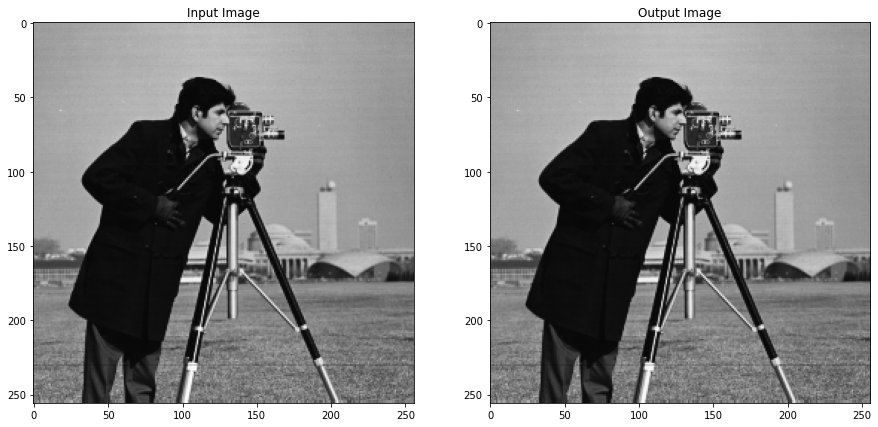

In [18]:
dfileName = input("Enter the filename: (eg- Cover_1.png or Cover_2.png)")
key = input("Enter the key:")
message = input("Enter the message to be hidden:")

psnr, inputImage, outputImage = encodingMessage(fileName, key, message)
extractedMessage = extractData(key)

plt.figure(figsize=(15,15));
plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)), plt.title("Input Image")
plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(outputImage, cv2.COLOR_BGR2RGB)), plt.title("Output Image") 
print("Extracted message = {}".format(extractedMessage))

In [19]:
print("Psnr value = {}".format(psnr))

Psnr value = 100
